In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS
from statsmodels.api import add_constant

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import os
os.getcwd()

'C:\\Users\\SarShel\\DEC\\CodeSprints\\Classification\\Regression'

In [3]:
os.chdir('C:\\Users\\SarShel\\DEC\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [4]:
# Read Classified field dataset 
FieldData0 = pd.read_csv('data_raw/ClassifiedData/FieldData_class.csv')

# Remove none values
FieldData = FieldData0.dropna()

# Display DataFrame
print(FieldData)

      Unnamed: 0         Lake Name          Y          X       Date  Year  \
0              0  Little Long Pond  40.977600 -72.296204   6/4/2016  2016   
1              1        Hatch Lake  42.834598 -75.677803   6/5/2016  2016   
2              2   Montgomery Lake  41.525299 -74.917297   6/4/2016  2016   
3              3         Dean Pond  42.447700 -76.003403   6/4/2016  2016   
4              4   Chautauqua Lake  42.219885 -79.455423   6/5/2016  2016   
...          ...               ...        ...        ...        ...   ...   
4599        4599         Long Pond  40.975102 -72.290802  7/12/2020  2020   
4600        4600         Long Pond  40.975102 -72.290802  7/26/2020  2020   
4601        4601         Long Pond  40.975102 -72.290802   8/9/2020  2020   
4602        4602         Long Pond  40.975102 -72.290802  8/23/2020  2020   
4603        4603         Long Pond  40.975102 -72.290802   9/7/2020  2020   

      Month  Day  Chl-a(ug/l)  SDD (m)  Phos (mg/l)  Chl score  SDD score  

In [5]:
# Read S2 dataset 
S2Data0 = pd.read_csv('data_raw/ClassifiedData/S2Data.csv')

# Remove none values
S2Data = S2Data0.dropna()

# Display DataFrame
print(S2Data)

       Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0      2016      5    7  0.956819 -0.044095 -0.022067  0.117900  0.002955   
1      2016      5    7  0.956897 -0.043909 -0.022026  0.117907  0.002955   
2      2016      5    7  1.015060  0.016807  0.007474  0.147959  0.008728   
3      2016      5    7  0.991619 -0.009014 -0.004208  0.142645  0.007528   
4      2016      5    7  0.881187 -0.110047 -0.063158  0.116655  0.002038   
...     ...    ...  ...       ...       ...       ...       ...       ...   
35028  2020     10   30  0.853926 -0.129055 -0.078792  0.152807  0.001676   
35029  2020     10   30  1.077396  0.061427  0.037256  0.126659  0.001469   
35030  2020     10   30  0.945077 -0.051659 -0.028237  0.134852  0.007321   
35031  2020     10   30  0.961857 -0.039219 -0.019442  0.132445  0.007393   
35032  2020     10   30  0.959639 -0.039047 -0.020596  0.126638  0.006003   

            B11       B12  ...        B3        B4        B5        B6  \
0

In [6]:
# Merge classified FieldData and S2Data; 
Data_class = pd.merge(FieldData, S2Data, on=['Y', 'X', 'Year', 'Month', 'Day'], how='inner')
Data_class.to_csv('data_output/ClassifiedData/Data_class.csv')

# displaying result
print(Data_class)

      Unnamed: 0          Lake Name          Y          X       Date  Year  \
0             36          Kirk Lake  41.385601 -73.749802  6/27/2016  2016   
1             36          Kirk Lake  41.385601 -73.749802  6/27/2016  2016   
2             36          Kirk Lake  41.385601 -73.749802  6/27/2016  2016   
3             39     Cazenovia Lake  42.948200 -75.872002  6/23/2016  2016   
4             39     Cazenovia Lake  42.948200 -75.872002  6/23/2016  2016   
...          ...                ...        ...        ...        ...   ...   
1088        4587  Little Fresh Pond  40.918201 -72.408501  8/30/2020  2020   
1089        4592   Little Long Pond  40.977600 -72.296204  7/26/2020  2020   
1090        4592   Little Long Pond  40.977600 -72.296204  7/26/2020  2020   
1091        4600          Long Pond  40.975102 -72.290802  7/26/2020  2020   
1092        4600          Long Pond  40.975102 -72.290802  7/26/2020  2020   

      Month  Day  Chl-a(ug/l)  SDD (m)  ...       B12        B2

In [7]:
# Return the natural logarithm of Chl-a (Y)
Data_class['LnChl-a']=np.log(Data_class['Chl-a(ug/l)'])
print(Data_class)

      Unnamed: 0          Lake Name          Y          X       Date  Year  \
0             36          Kirk Lake  41.385601 -73.749802  6/27/2016  2016   
1             36          Kirk Lake  41.385601 -73.749802  6/27/2016  2016   
2             36          Kirk Lake  41.385601 -73.749802  6/27/2016  2016   
3             39     Cazenovia Lake  42.948200 -75.872002  6/23/2016  2016   
4             39     Cazenovia Lake  42.948200 -75.872002  6/23/2016  2016   
...          ...                ...        ...        ...        ...   ...   
1088        4587  Little Fresh Pond  40.918201 -72.408501  8/30/2020  2020   
1089        4592   Little Long Pond  40.977600 -72.296204  7/26/2020  2020   
1090        4592   Little Long Pond  40.977600 -72.296204  7/26/2020  2020   
1091        4600          Long Pond  40.975102 -72.290802  7/26/2020  2020   
1092        4600          Long Pond  40.975102 -72.290802  7/26/2020  2020   

      Month  Day  Chl-a(ug/l)  SDD (m)  ...        B2        B3

In [10]:
# Select Mesotrophic Data 
Mesotrophic_data = Data_class.loc[(Data_class ['Tropic state'] == 'Mesotrophic')]
Mesotrophic_data.shape

(322, 33)

In [11]:
# Descriptive statistics of all variables
list = ['2BDA', '3BDA', 'NDCI', 'LnChl-a']

# get the summary for Mesotrophic Lakes
desc_Mesotrophic = Mesotrophic_data [list].describe()

# add the standard deviation metric
desc_Mesotrophic.loc['+3_std'] = desc_Mesotrophic.loc['mean'] + (desc_Mesotrophic.loc['std'] * 3)
desc_Mesotrophic.loc['-3_std'] = desc_Mesotrophic.loc['mean'] - (desc_Mesotrophic.loc['std'] * 3)

# display it
desc_Mesotrophic

,2BDA,3BDA,NDCI,LnChl-a
count,322.000000,322.000000,322.000000,322.000000
mean,0.982029,-0.006932,-0.011797,1.303196
std,0.107768,0.157077,0.050627,0.734080
min,0.806335,-0.181678,-0.107215,-2.995732
25%,0.907109,-0.102104,-0.048708,0.964509
50%,0.958751,-0.048501,-0.021059,1.368863
75%,1.037415,0.047345,0.018363,1.772054
max,1.612425,1.130994,0.234428,3.288402
+3_std,1.305331,0.464300,0.140084,3.505437
-3_std,0.658726,-0.478163,-0.163678,-0.899045


In [12]:
# Pearson Coefficient 
corr = Mesotrophic_data[list].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,3BDA,NDCI,LnChl-a
2BDA,1.000000,0.971951,0.994673,-0.097919
3BDA,0.971951,1.000000,0.946667,-0.106385
NDCI,0.994673,0.946667,1.000000,-0.097216
LnChl-a,-0.097919,-0.106385,-0.097216,1.000000


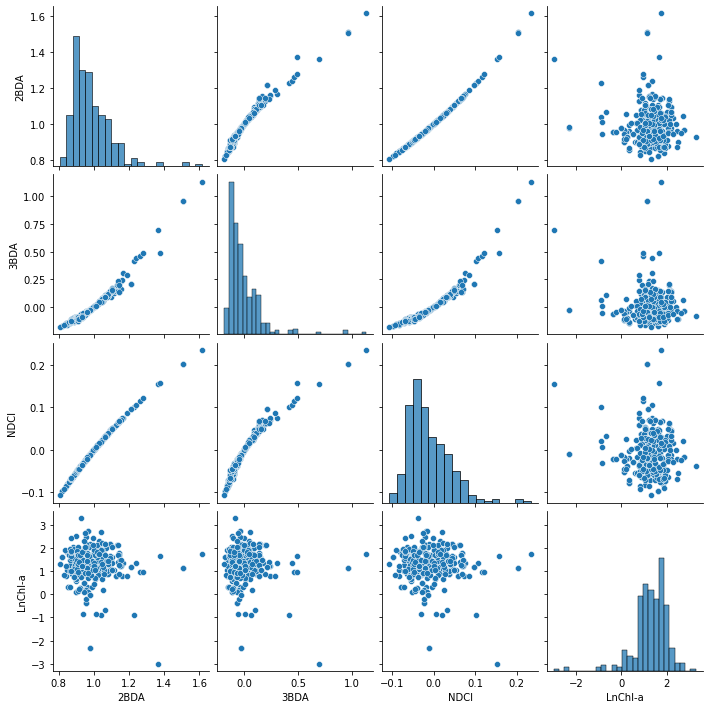

In [13]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Mesotrophic_data[list])

In [14]:
# Getting column names
X_columns = ["2BDA", "3BDA", "NDCI"]
Y = Mesotrophic_data["LnChl-a"]

In [15]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Mesotrophic_data[X_columns[0:3]].values, i) for i in range(Mesotrophic_data[X_columns[0:3]].shape[1])]
vif["features"] = Mesotrophic_data[X_columns[0:3]].columns

# display VIF
vif.round()

,VIF Factor,features
0,1.0,2BDA
1,10.0,3BDA
2,10.0,NDCI


In [16]:
# Extract independent variables (X) & dependent variable (Y)
X = Mesotrophic_data[X_columns]
X = add_constant(X)
Y = Mesotrophic_data['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                LnChl-a   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.839
Date:                Mon, 07 Mar 2022   Prob (F-statistic):              0.141
Time:                        15:49:46   Log-Likelihood:                -241.51
No. Observations:                 225   AIC:                             491.0
Df Residuals:                     221   BIC:                             504.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.5710      9.627     -1.410      0.1

In [17]:
# Get predictions
LnY_predict = result.predict(X_test)
print('predicted Y:', LnY_predict)

predicted Y: 857    1.255008
609    1.346556
577    1.327175
788    1.298256
550    1.332390
         ...   
192    1.298133
393    1.316369
580    1.275017
851    1.282017
473    1.302693
Length: 97, dtype: float64


In [18]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 5.74
MAE 2.26
RMSE 2.4


In [19]:
# 2 variables model (2BDA & 3BDA)

In [21]:
list1 = ['2BDA', '3BDA', 'LnChl-a']

# get the summary for Mesotrophic Lakes
desc_Mesotrophic = Mesotrophic_data [list1].describe()

# add the standard deviation metric
desc_Mesotrophic.loc['+3_std'] = desc_Mesotrophic.loc['mean'] + (desc_Mesotrophic.loc['std'] * 3)
desc_Mesotrophic.loc['-3_std'] = desc_Mesotrophic.loc['mean'] - (desc_Mesotrophic.loc['std'] * 3)

# display it
desc_Mesotrophic

,2BDA,3BDA,LnChl-a
count,322.000000,322.000000,322.000000
mean,0.982029,-0.006932,1.303196
std,0.107768,0.157077,0.734080
min,0.806335,-0.181678,-2.995732
25%,0.907109,-0.102104,0.964509
50%,0.958751,-0.048501,1.368863
75%,1.037415,0.047345,1.772054
max,1.612425,1.130994,3.288402
+3_std,1.305331,0.464300,3.505437
-3_std,0.658726,-0.478163,-0.899045


In [22]:
# Pearson Coefficient 
corr = Mesotrophic_data[list1].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,3BDA,LnChl-a
2BDA,1.000000,0.971951,-0.097919
3BDA,0.971951,1.000000,-0.106385
LnChl-a,-0.097919,-0.106385,1.000000


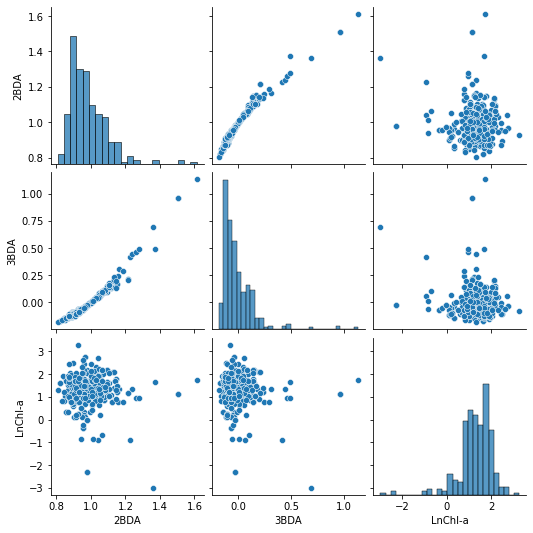

In [23]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Mesotrophic_data[list1])

In [24]:
# Getting column names
X_columns1 = ["2BDA", "3BDA"]
Y = Mesotrophic_data["LnChl-a"]

In [25]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Mesotrophic_data[X_columns1[0:2]].values, i) for i in range(Mesotrophic_data[X_columns1[0:2]].shape[1])]
vif["features"] = Mesotrophic_data[X_columns1[0:2]].columns

# display VIF
vif.round()

,VIF Factor,features
0,1.0,2BDA
1,1.0,3BDA


In [26]:
# Extract independent variables (X) & dependent variable (Y)
X = Mesotrophic_data[X_columns1]
X = add_constant(X)
Y = Mesotrophic_data['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                LnChl-a   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.770
Date:                Mon, 07 Mar 2022   Prob (F-statistic):              0.173
Time:                        15:50:19   Log-Likelihood:                -242.51
No. Observations:                 225   AIC:                             491.0
Df Residuals:                     222   BIC:                             501.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3053      1.732     -0.176      0.8

In [27]:
# 2 variables model (2BDA & NDCI)

In [29]:
list2 = ['2BDA', 'NDCI', 'LnChl-a']

# get the summary for Mesotrophic Lakes
desc_Mesotrophic = Mesotrophic_data [list2].describe()

# add the standard deviation metric
desc_Mesotrophic.loc['+3_std'] = desc_Mesotrophic.loc['mean'] + (desc_Mesotrophic.loc['std'] * 3)
desc_Mesotrophic.loc['-3_std'] = desc_Mesotrophic.loc['mean'] - (desc_Mesotrophic.loc['std'] * 3)

# display it
desc_Mesotrophic

,2BDA,NDCI,LnChl-a
count,322.000000,322.000000,322.000000
mean,0.982029,-0.011797,1.303196
std,0.107768,0.050627,0.734080
min,0.806335,-0.107215,-2.995732
25%,0.907109,-0.048708,0.964509
50%,0.958751,-0.021059,1.368863
75%,1.037415,0.018363,1.772054
max,1.612425,0.234428,3.288402
+3_std,1.305331,0.140084,3.505437
-3_std,0.658726,-0.163678,-0.899045


In [30]:
# Pearson Coefficient 
corr = Mesotrophic_data[list2].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,NDCI,LnChl-a
2BDA,1.000000,0.994673,-0.097919
NDCI,0.994673,1.000000,-0.097216
LnChl-a,-0.097919,-0.097216,1.000000


In [31]:
# Getting column names
X_columns2 = ["2BDA", "NDCI"]
Y = Mesotrophic_data["LnChl-a"]

In [32]:
# Extract independent variables (X) & dependent variable (Y)
X = Mesotrophic_data[X_columns2]
X = add_constant(X)
Y = Mesotrophic_data['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                LnChl-a   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9808
Date:                Mon, 07 Mar 2022   Prob (F-statistic):              0.377
Time:                        15:50:40   Log-Likelihood:                -243.30
No. Observations:                 225   AIC:                             492.6
Df Residuals:                     222   BIC:                             502.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9601      3.937      0.752      0.4